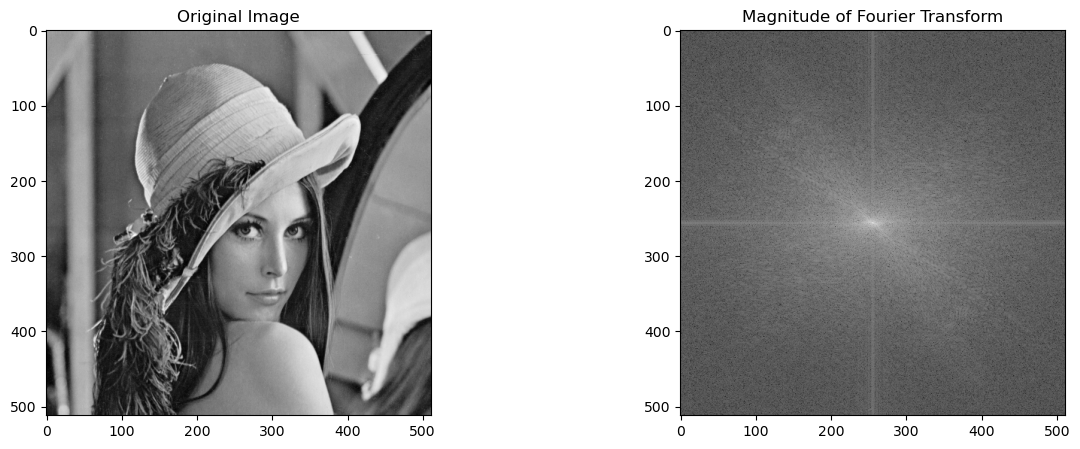

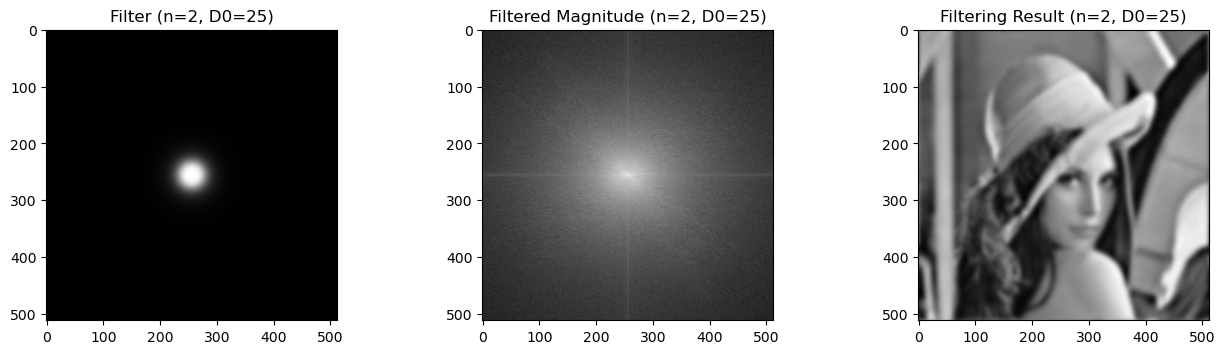

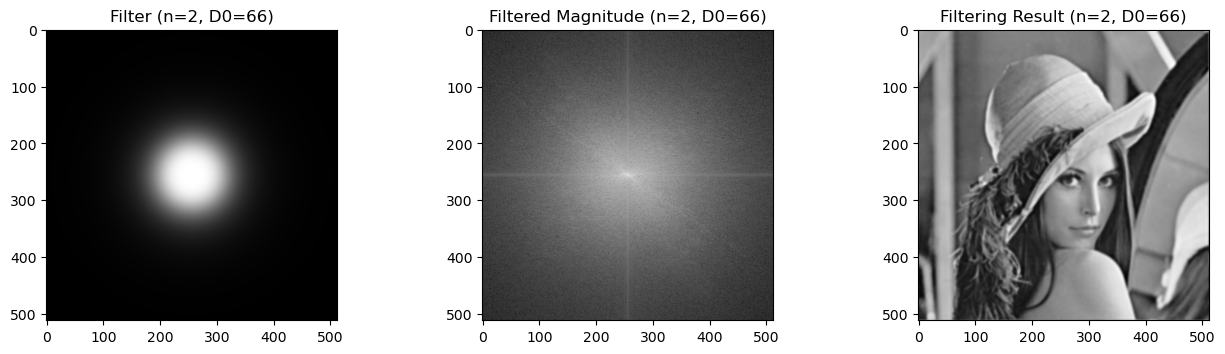

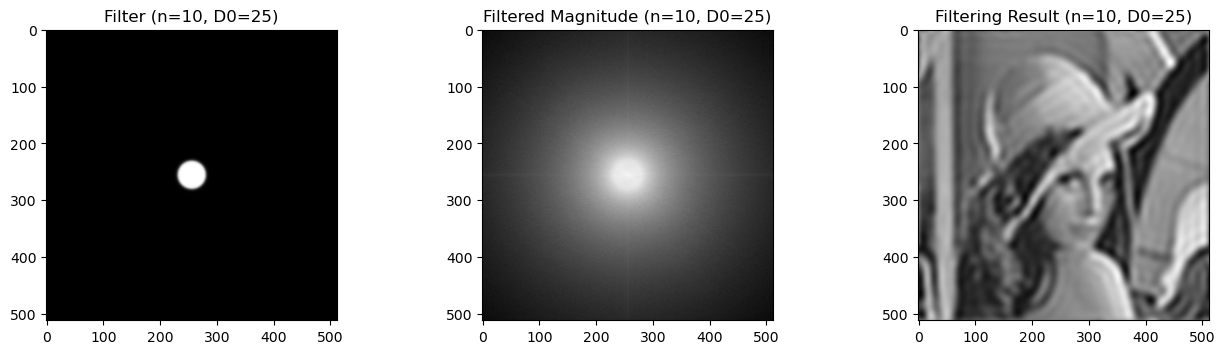

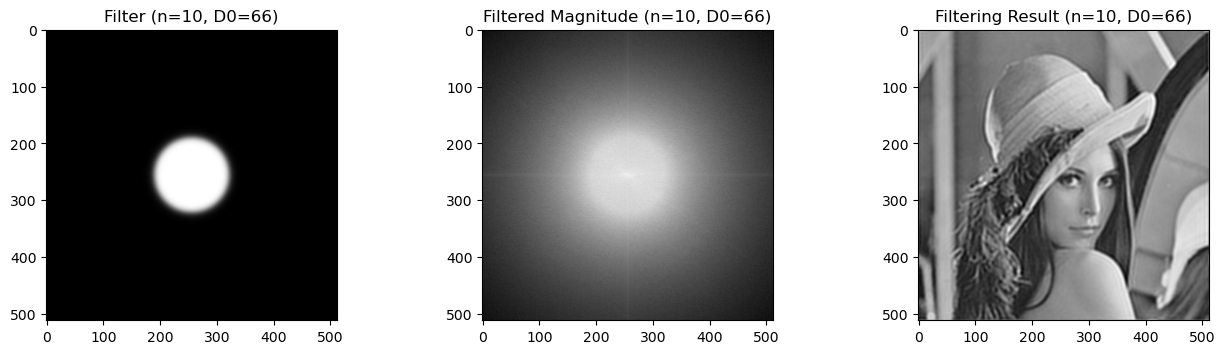

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Lenna.png', 0)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Compute the Fourier transform of Lenna.png
img_ft = np.fft.fft2(img)
img_ftshift = np.fft.fftshift(img_ft)
magnitude_spectrum = 20 * np.log(np.abs(img_ftshift))

#Show its magnitude
plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude of Fourier Transform')
plt.show()

# Define the function to apply Butterworth low pass filter
def butterworthLowpassFilter(img, D0, n):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    distance = np.sqrt((u - ccol)**2 + (v - crow)**2)
    H = 1 / (1 + (distance / D0)**(2*n))
    return H

#define parameters
n_values = [2, 10]
D0_values = [25, 66]

for n in n_values:
    for D0 in D0_values:
        
        #appy the filter
        H = butterworthLowpassFilter(img, D0, n)
        
        plt.figure(figsize=(15, 5))

        #show the filter 𝐻𝐿𝑜𝑤𝑃𝑎𝑠s
        plt.subplot(1,3,1)
        plt.imshow(H, cmap='gray')
        plt.title('Filter ' f'(n={n}, D0={D0})')
        
        
        
        # Apply the filter in frequency domain
        G = img_ftshift * H
        
        #magnitude of the filtering result in frequency domain
        magnitude_spectrum_filtered = 20 * np.log(np.abs(G))
        plt.subplot(1,3,2)
        plt.imshow(magnitude_spectrum_filtered, cmap='gray')
        plt.title('Filtered Magnitude ' f'(n={n}, D0={D0})')
        
        
        # apply the inverse FT
        G_shift = np.fft.ifftshift(G)
        img_filtered = np.fft.ifft2(G_shift)
        img_filtered = np.real(img_filtered)
        
         #the filtering result in spatial domain
        plt.subplot(1,3,3)
        plt.imshow(img_filtered, cmap='gray')
        plt.subplots_adjust(wspace=0.5)
        plt.title('Filtering Result ' f'(n={n}, D0={D0})')
        plt.show()
